<a href="https://colab.research.google.com/github/NeZorinEgor/Computer-vision/blob/main/Movement%20Trajectory/Movement_Trajectory_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

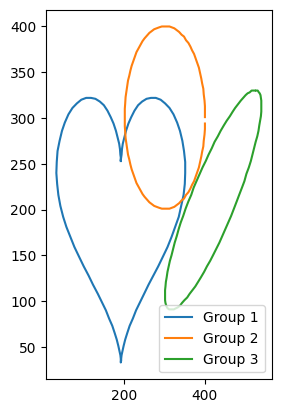

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

def process_image(file_index):
    file_path = f"h_{file_index}.npy"
    data = np.load(file_path)
    labeled_data = label(data)
    regions = regionprops(labeled_data)
    sorted_regions = sorted(regions, key=lambda region: region.area)

    x_buf, y_buf = [], []

    for region in sorted_regions:
        bbox = region.bbox
        r = labeled_data[bbox[0]:bbox[2], bbox[1]:bbox[3]]
        x = bbox[2] - bbox[0]
        y = bbox[3] - bbox[1]
        x_buf.append(bbox[1] + y // 2)
        y_buf.append(bbox[0] + x // 2)

    return x_buf, y_buf

def main():
    num_files = 99

    x_combined, y_combined = [], []

    for i in range(num_files):
        x_buf, y_buf = process_image(i + 1)
        x_combined.extend(x_buf)
        y_combined.extend(y_buf)

    plt.subplot(122)
    plt.plot(x_combined[::3], y_combined[::3], label='Group 1')
    plt.plot(x_combined[1::3], y_combined[1::3], label='Group 2')
    plt.plot(x_combined[2::3], y_combined[2::3], label='Group 3')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
